In [ ]:
#Importamos las Librerías:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings

warnings.filterwarnings("ignore")

In [ ]:
#Determinamos cuántas columnas y rows queremos que nos muestre por defecto:

pd.options.display.max_rows = 100
pd.options.display.max_columns = 200

In [ ]:
#Importamos el dataset:

data = pd.read_csv("https://raw.githubusercontent.com/johanjohnson/DataCleaning---ChurnDataSet/main/churn_raw_data.csv")

df_orig =pd.DataFrame(data)

In [ ]:
#Función para pasar a minúsculas los string de una lista o array:

def to_lowercase(arr):
 new_arr = []
 for x in list(range(0,len(arr))):
   new = arr[x].lower()
   new_arr.append(new)
 return new_arr

In [ ]:
#Convertimos mayúsculas en minúsculas:

col_names = to_lowercase(df_orig.columns.values)

df_orig.set_axis(col_names,axis='columns',inplace=True)

df_orig.columns.values

array(['unnamed: 0', 'caseorder', 'customer_id', 'interaction', 'city',
       'state', 'county', 'zip', 'lat', 'lng', 'population', 'area',
       'timezone', 'job', 'children', 'age', 'education', 'employment',
       'income', 'marital', 'gender', 'churn', 'outage_sec_perweek',
       'email', 'contacts', 'yearly_equip_failure', 'techie', 'contract',
       'port_modem', 'tablet', 'internetservice', 'phone', 'multiple',
       'onlinesecurity', 'onlinebackup', 'deviceprotection',
       'techsupport', 'streamingtv', 'streamingmovies',
       'paperlessbilling', 'paymentmethod', 'tenure', 'monthlycharge',
       'bandwidth_gb_year', 'item1', 'item2', 'item3', 'item4', 'item5',
       'item6', 'item7', 'item8'], dtype=object)

In [ ]:
#Creamos el Dataframe df únicamente con las columnas que nos interesan:

df = df_orig[['outage_sec_perweek','phone','email', 'contacts', 'yearly_equip_failure', 'tenure', 'monthlycharge', 'churn', 'internetservice', 'onlinesecurity', 'onlinebackup', 'techsupport', 'deviceprotection', 'streamingtv', 'streamingmovies', 'item1', 'item2', 'item3', 'item4', 'item5', 'item6', 'item7', 'item8']].copy(deep=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   outage_sec_perweek    10000 non-null  float64
 1   phone                 8974 non-null   object 
 2   email                 10000 non-null  int64  
 3   contacts              10000 non-null  int64  
 4   yearly_equip_failure  10000 non-null  int64  
 5   tenure                9069 non-null   float64
 6   monthlycharge         10000 non-null  float64
 7   churn                 10000 non-null  object 
 8   internetservice       10000 non-null  object 
 9   onlinesecurity        10000 non-null  object 
 10  onlinebackup          10000 non-null  object 
 11  techsupport           9009 non-null   object 
 12  deviceprotection      10000 non-null  object 
 13  streamingtv           10000 non-null  object 
 14  streamingmovies       10000 non-null  object 
 15  item1               

In [ ]:
#Creamos nuevas variables que cuentan la cantidad de cada tipo de servicios y el total de servicios que los clientes contratan:

df['q_online_serv'] = df.internetservice.apply(lambda x: 1 if x in ['Fiber Optic', 'DSL'] else 0).values + df.onlinesecurity.apply(lambda x: 1 if x == 'Yes' else 0).values + df.onlinebackup.apply(lambda x: 1 if x == 'Yes' else 0).values+df.techsupport.apply(lambda x: 1 if x== 'Yes' else 0).values
df['q_phone_serv']=df.phone.apply(lambda x: 1 if x == 'Yes' else 0).values+df.deviceprotection.apply(lambda x: 1 if x == 'Yes' else 0).values
df['q_streaming'] = df.streamingtv.apply(lambda x:1 if x=='Yes' else 0).values + df.streamingmovies.apply(lambda x:1 if x=='Yes'else 0).values

df['q_total_serv']= df['q_online_serv'].values+df['q_phone_serv'].values+df['q_streaming'].values

df[['q_online_serv','q_phone_serv','q_total_serv', 'q_streaming']]

,q_online_serv,q_phone_serv,q_total_serv,q_streaming
0,3,1,5,1
1,2,1,5,2
2,1,1,3,1
3,2,1,4,1
4,2,0,3,1
...,...,...,...,...
9995,2,1,3,0
9996,3,1,5,1
9997,3,1,4,0
9998,2,0,4,2


In [ ]:
#Creamos una variable que unifica los valores obtenidos en la encuesta:

df['total_encuesta']=df.item1.values+df.item2.values+df.item3.values+df.item4.values+df.item5.values+df.item6.values+df.item7.values+df.item8.values
df['total_encuesta']

0       33
1       28
2       27
3       29
4       32
        ..
9995    23
9996    34
9997    33
9998    33
9999    21
Name: total_encuesta, Length: 10000, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   outage_sec_perweek    10000 non-null  float64
 1   phone                 8974 non-null   object 
 2   email                 10000 non-null  int64  
 3   contacts              10000 non-null  int64  
 4   yearly_equip_failure  10000 non-null  int64  
 5   tenure                9069 non-null   float64
 6   monthlycharge         10000 non-null  float64
 7   churn                 10000 non-null  object 
 8   internetservice       10000 non-null  object 
 9   onlinesecurity        10000 non-null  object 
 10  onlinebackup          10000 non-null  object 
 11  techsupport           9009 non-null   object 
 12  deviceprotection      10000 non-null  object 
 13  streamingtv           10000 non-null  object 
 14  streamingmovies       10000 non-null  object 
 15  item1               

In [ ]:
#Eliminamos las variables que no necesitamos:

df.drop(['phone', 'internetservice', 'onlinesecurity', 'onlinebackup', 'techsupport', 'deviceprotection', 'streamingtv', 'streamingmovies', 'item1', 'item2', 'item3', 'item4', 'item5', 'item6', 'item7', 'item8'],axis=1,inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   outage_sec_perweek    10000 non-null  float64
 1   email                 10000 non-null  int64  
 2   contacts              10000 non-null  int64  
 3   yearly_equip_failure  10000 non-null  int64  
 4   tenure                9069 non-null   float64
 5   monthlycharge         10000 non-null  float64
 6   churn                 10000 non-null  object 
 7   q_online_serv         10000 non-null  int64  
 8   q_phone_serv          10000 non-null  int64  
 9   q_streaming           10000 non-null  int64  
 10  q_total_serv          10000 non-null  int64  
 11  total_encuesta        10000 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 937.6+ KB


In [ ]:
#Spliteamos el Dataframe en Train y Test (80/20):
msk = np.random.rand(len(df)) <= 0.8

df_train = df[msk]
df_test = df[~msk]

In [ ]:
#Verificamos los nulos de cada uno:

df_train.isnull().sum()

outage_sec_perweek        0
email                     0
contacts                  0
yearly_equip_failure      0
tenure                  764
monthlycharge             0
churn                     0
q_online_serv             0
q_phone_serv              0
q_streaming               0
q_total_serv              0
total_encuesta            0
dtype: int64

In [ ]:
df_test.isnull().sum()

outage_sec_perweek        0
email                     0
contacts                  0
yearly_equip_failure      0
tenure                  167
monthlycharge             0
churn                     0
q_online_serv             0
q_phone_serv              0
q_streaming               0
q_total_serv              0
total_encuesta            0
dtype: int64

In [ ]:
#Llenamos los nulos con la Mediana de la agrupacion churn y streaming:

#Creamos dataframe de referencia:
tenure_ref_null = df_train.groupby(['churn', 'q_streaming']).median()['tenure'].reset_index() #convendría hacerlo por q_total? o lo hacemos por q_streaming porque es donde hay más diferencia?

#Funcion de replace en base a dataframe agrupado:
def fill_na_tenure_grouped(df_grouped , row_replace):
  if pd.isna(row_replace['tenure']):
    return df_grouped[(df_grouped['churn'] == row_replace['churn']) & (df_grouped['q_streaming'] == row_replace['q_streaming'])]['tenure'].values[0]
  else:
    return row_replace['tenure']

#Transformamos Train
df_train['tenure'] = df_train.apply(lambda row: fill_na_tenure_grouped(tenure_ref_null, row), axis=1)

In [ ]:
#Invocamos el Dataframe de referencia:

tenure_ref_null

,churn,q_streaming,tenure
0,No,0,45.556665
1,No,1,53.662190
2,No,2,61.099715
3,Yes,0,5.799929
4,Yes,1,7.226613
5,Yes,2,9.388278


In [ ]:
#Corroboramos que ya no hay nulos en Train:

df_train.isnull().sum()

outage_sec_perweek      0
email                   0
contacts                0
yearly_equip_failure    0
tenure                  0
monthlycharge           0
churn                   0
q_online_serv           0
q_phone_serv            0
q_streaming             0
q_total_serv            0
total_encuesta          0
dtype: int64

In [ ]:
from sklearn.preprocessing import OneHotEncoder

#Generamos el One Hot Encoder class:
encoder = OneHotEncoder(handle_unknown='ignore',
                        sparse=False)

#Entrenamiento para generar el preprocesamiento One Hot Encoding para las variables indicadas:
encoder.fit(df_train[['q_online_serv','q_phone_serv','q_streaming','q_total_serv','churn']])

#Transformamos en train datasets en base a la clase generada:
cat_encoding = pd.DataFrame(encoder.transform(df_train[['q_online_serv','q_phone_serv','q_streaming','q_total_serv','churn']]), columns=encoder.get_feature_names(['q_online_serv','q_phone_serv','q_streaming','q_total_serv','churn']))
cat_encoding.head()

,q_online_serv_0,q_online_serv_1,q_online_serv_2,q_online_serv_3,q_online_serv_4,q_phone_serv_0,q_phone_serv_1,q_phone_serv_2,q_streaming_0,q_streaming_1,q_streaming_2,q_total_serv_0,q_total_serv_1,q_total_serv_2,q_total_serv_3,q_total_serv_4,q_total_serv_5,q_total_serv_6,q_total_serv_7,q_total_serv_8,churn_No,churn_Yes
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
#Reseteamos el index para poder concatenarlo con el df de los cat_encoding:

df_train.reset_index(inplace = True, drop=True)

In [ ]:
#Joineo de las variables que deseo con categoricas encoding:

df_all_train = pd.concat([df_train, cat_encoding], axis=1)

#Borrado de columnas no necesarias:
df_all_train.drop(['q_online_serv','q_phone_serv','q_streaming','q_total_serv','churn','churn_No'],axis=1, inplace=True)

#Train datasets final:
df_all_train.head()

,outage_sec_perweek,email,contacts,yearly_equip_failure,tenure,monthlycharge,total_encuesta,q_online_serv_0,q_online_serv_1,q_online_serv_2,q_online_serv_3,q_online_serv_4,q_phone_serv_0,q_phone_serv_1,q_phone_serv_2,q_streaming_0,q_streaming_1,q_streaming_2,q_total_serv_0,q_total_serv_1,q_total_serv_2,q_total_serv_3,q_total_serv_4,q_total_serv_5,q_total_serv_6,q_total_serv_7,q_total_serv_8,churn_Yes
0,12.014541,12,0,1,1.156681,242.948015,28,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,10.245616,9,0,1,15.754144,159.440398,27,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,8.960316,16,2,1,1.670972,150.761216,32,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,7.814859,15,3,1,7.000994,184.401558,24,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,11.129094,10,0,1,13.236774,200.064886,37,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [ ]:
df_all_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8002 entries, 0 to 8001
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   outage_sec_perweek    8002 non-null   float64
 1   email                 8002 non-null   int64  
 2   contacts              8002 non-null   int64  
 3   yearly_equip_failure  8002 non-null   int64  
 4   tenure                8002 non-null   float64
 5   monthlycharge         8002 non-null   float64
 6   total_encuesta        8002 non-null   int64  
 7   q_online_serv_0       8002 non-null   float64
 8   q_online_serv_1       8002 non-null   float64
 9   q_online_serv_2       8002 non-null   float64
 10  q_online_serv_3       8002 non-null   float64
 11  q_online_serv_4       8002 non-null   float64
 12  q_phone_serv_0        8002 non-null   float64
 13  q_phone_serv_1        8002 non-null   float64
 14  q_phone_serv_2        8002 non-null   float64
 15  q_streaming_0        

In [ ]:
#Corroboramos que ya no hay nulos en Train:

df_all_train.isnull().sum()

outage_sec_perweek      0
email                   0
contacts                0
yearly_equip_failure    0
tenure                  0
monthlycharge           0
total_encuesta          0
q_online_serv_0         0
q_online_serv_1         0
q_online_serv_2         0
q_online_serv_3         0
q_online_serv_4         0
q_phone_serv_0          0
q_phone_serv_1          0
q_phone_serv_2          0
q_streaming_0           0
q_streaming_1           0
q_streaming_2           0
q_total_serv_0          0
q_total_serv_1          0
q_total_serv_2          0
q_total_serv_3          0
q_total_serv_4          0
q_total_serv_5          0
q_total_serv_6          0
q_total_serv_7          0
q_total_serv_8          0
churn_Yes               0
dtype: int64

In [ ]:
#Spliteamos datos en target y features para Test y Train:

#Selección de x values sin el target:
X_train = df_all_train.loc[:,df_all_train.columns != 'churn_Yes']

#Selección del target:
y_train = df_all_train.churn_Yes

In [ ]:
#Training del modelo:

from sklearn import tree

model_default = tree.DecisionTreeClassifier(random_state = 42)
model_default.fit(X_train, y_train)

#Modelo generado con algún hiperparámetro diferente:
model_max_depth = tree.DecisionTreeClassifier(random_state = 42, max_depth=7) 
model_max_depth.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, random_state=42)

In [ ]:
#Trasnformación de Test:

#Reemplazamos los nulos de Tenure con la Mediana de la agrupacion churn y streaming:
df_test['tenure'] = df_test.apply(lambda row: fill_na_tenure_grouped(tenure_ref_null, row), axis=1)


#One Hot Encoding para los datos del Test:
cat_encoding_test = pd.DataFrame(encoder.transform(df_test[['q_online_serv','q_phone_serv','q_streaming','q_total_serv','churn']]), columns=encoder.get_feature_names(['q_online_serv','q_phone_serv','q_streaming','q_total_serv','churn']))

#Reseteamos el index para poder concatenarlo con el df de los cat_encoding:
df_test.reset_index(inplace = True, drop=True)

#Concatenamos con la info del encoding:
df_all_test = pd.concat([df_test, cat_encoding_test], axis=1)

#borrado de las mismas variables:
df_all_test.drop(['q_online_serv','q_phone_serv','q_streaming','q_total_serv','churn','churn_No'],axis=1, inplace=True)

In [ ]:
df_all_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1988 entries, 0 to 1987
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   outage_sec_perweek    1988 non-null   float64
 1   email                 1988 non-null   int64  
 2   contacts              1988 non-null   int64  
 3   yearly_equip_failure  1988 non-null   int64  
 4   tenure                1988 non-null   float64
 5   monthlycharge         1988 non-null   float64
 6   total_encuesta        1988 non-null   int64  
 7   q_online_serv_0       1988 non-null   float64
 8   q_online_serv_1       1988 non-null   float64
 9   q_online_serv_2       1988 non-null   float64
 10  q_online_serv_3       1988 non-null   float64
 11  q_online_serv_4       1988 non-null   float64
 12  q_phone_serv_0        1988 non-null   float64
 13  q_phone_serv_1        1988 non-null   float64
 14  q_phone_serv_2        1988 non-null   float64
 15  q_streaming_0        

In [ ]:
#Spliteamos los datos y target del Test:
X_test = df_all_test.loc[:,df_all_test.columns != 'churn_Yes'] 
y_test = df_all_test.churn_Yes

In [ ]:
#Predicción:

y_pred_test = model_max_depth.predict(X_test)
y_pred_test

array([1., 1., 0., ..., 0., 0., 0.])

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

#Accuracy
print('Accuracy score for test data is:', accuracy_score(y_test,y_pred_test))

confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_test))

confusion_matrix.index = ['Actual Churn','Actual No Churn']
confusion_matrix.columns = ['Predicted Churn','Predicted No Churn']
print(confusion_matrix)

Accuracy score for test data is: 0.8506036217303823
                 Predicted Churn  Predicted No Churn
Actual Churn                1298                 148
Actual No Churn              149                 393


- Tuvimos un 85% de Exactitud
- Tenemos 148 personas con Churn que habíamos predicho que serían No Churn (falso positivo)
- Tenemos 149 personas con No Churn cuando habíamos predicho que serían churn (falso negativo)

Deberíamos probar balanceando más al dataset para ver si mejora el rendimiento?

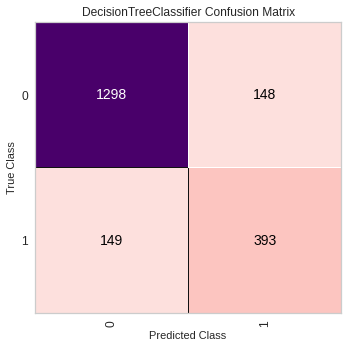

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(5,5))
cm = ConfusionMatrix(model_max_depth, classes=[0, 1], cmap='RdPu')
cm.score(X_test, y_test)
for label in cm.ax.texts:
    label.set_size(14)
cm.poof()

In [ ]:
import pydotplus #pip install pydotplus
from sklearn.tree import export_graphviz

def tree_graph_to_png(tree, feature_names, class_names, png_file_to_save):
    tree_str = export_graphviz(
        tree,
        out_file=None,
        feature_names=feature_names,
        class_names=class_names,
        rounded=True,
        filled=True
    )
    graph = pydotplus.graph_from_dot_data(tree_str)  
    graph.write_png(png_file_to_save)

#Lista de variables:
list_features = [x for x in df_all_train.columns if x != 'churn_Yes']
tree_graph_to_png(model_max_depth, list_features, df_all_train.churn_Yes.unique().astype(str), 'model.png')

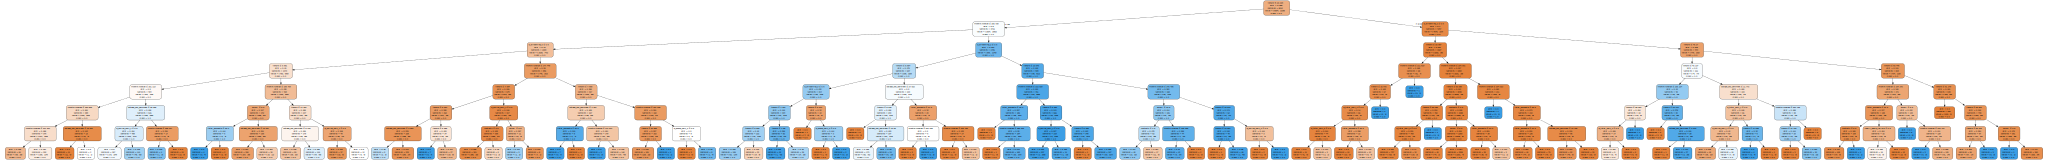

In [ ]:
import graphviz
from sklearn.tree import DecisionTreeClassifier, export_graphviz

list_features = [x for x in df_all_train.columns if x != 'churn_Yes']
data = export_graphviz(model_max_depth,out_file=None,feature_names=list_features,class_names=df_all_train.churn_Yes.unique().astype(str),   
                         filled=True, rounded=True,  
                         special_characters=True)
graph = graphviz.Source(data)
graph